In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [23]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [24]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [25]:
training_set = dataset_train.iloc[:, 1: 2].values

In [26]:
training_set.shape


(1258, 1)

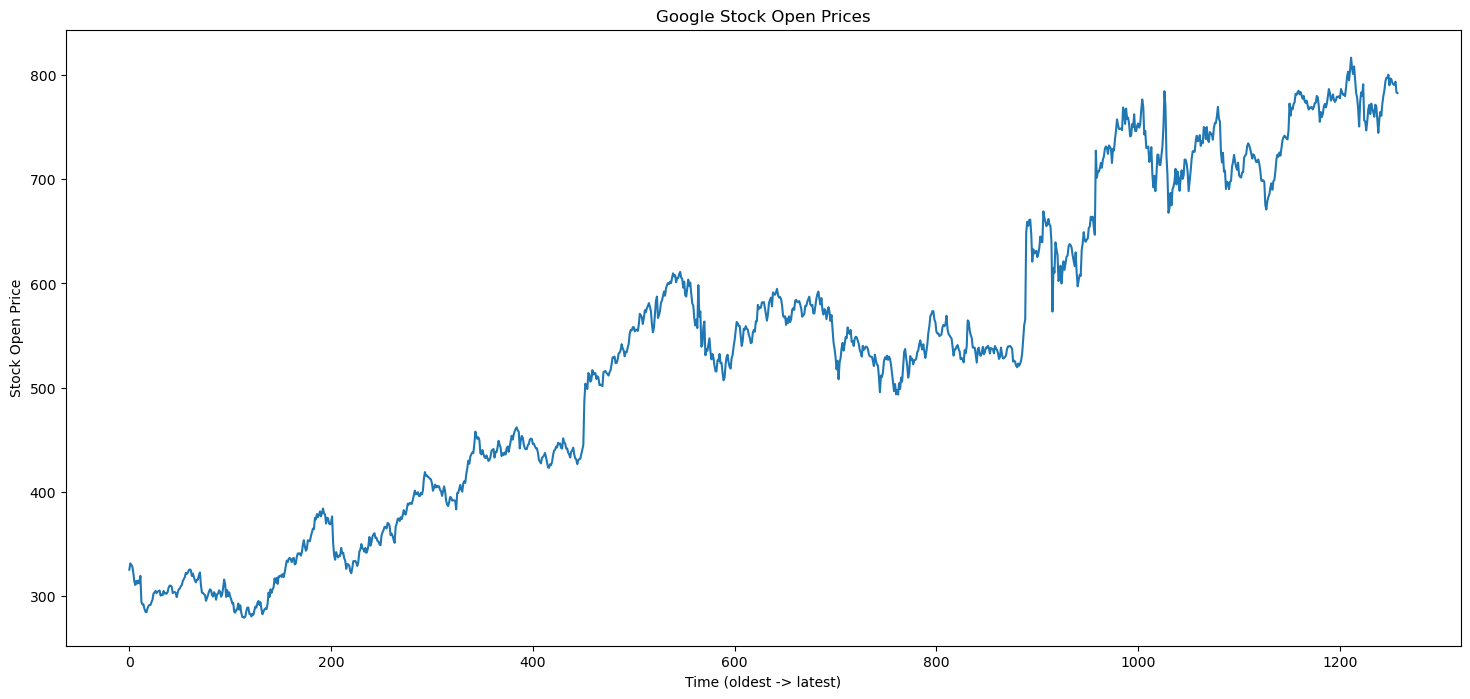

In [27]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [28]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [29]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [30]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train.shape

(1198, 60)

In [32]:
y_train.shape

(1198,)

In [33]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [34]:
X_train.shape

(1198, 60, 1)

In [35]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 30)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - loss: 0.0834
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0059
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0058
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0065
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0045
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0044
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0044
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0041
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0045
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0046
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0050
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0050
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0045
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0039
Epoch 15/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0047
Ep

In [39]:
dataset_test = pd.read_csv('Google_Stock_Price_Test (1).csv')

In [40]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [41]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [43]:
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [44]:
len(inputs)

80

In [45]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
X_test.shape

(20, 60, 1)

In [47]:
predicted_stock_price = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


In [48]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

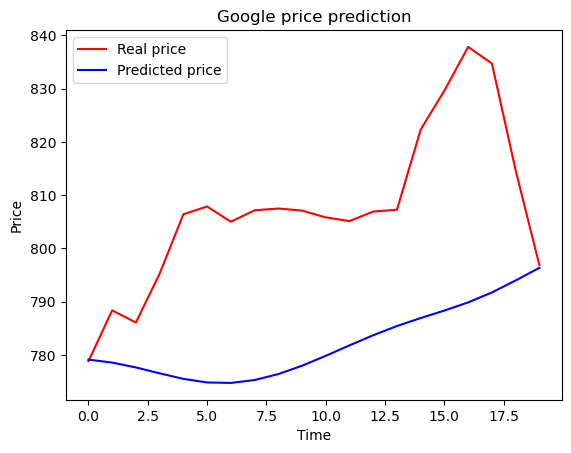

In [49]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()